<img src="https://www.mines.edu/webcentral/wp-content/uploads/sites/267/2019/02/horizontallightbackground.jpg" width="100%"> 
### CSCI250 Python Computing: Building a Sensor System
<hr style="height:5px" width="100%" align="left">

# `numpy`: 2D vectorization

# Objectives
* introduce fast vectorized `numpy` array operations
* evaluate computational speed-up relative to loops
* use multidimensional `numpy` matrix/vector operations 

# Resources
* [numpy.org](http://www.numpy.org)
* [`numpy` user guide](https://docs.scipy.org/doc/numpy/user)
* [`numpy` reference](https://docs.scipy.org/doc/numpy/reference)

# Definition

**Vectorization**: a computational style in which multiple operations are executed at once, i.e. execute a single global operation instead of multiple smaller operations in a loop. 

Has multiple advantages:
* **compact appearance**: the code resembles math
* **error reduction**: the code is shorter, less complex
* **execution performance**: the code runs much faster

# Multi-dimensional vectorization

Evaluate the function

$z = \sqrt{x^2 + y^2}$ 

$x$ and $y$ are `numpy` arrays of different dimensions.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
dx = 1.0
dy = 1.0

ox = 0.0
oy = 0.0

nx = 51
ny = 31

In [4]:
x = np.arange(ox, ox+nx*dx, dx)
y = np.arange(oy, oy+ny*dy, dy)
print(x)
print(y)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]


The arrays have different sizes - cannot be vectorized.

In [5]:
# this does not work
z = np.sqrt( x**2 + y**2 )

ValueError: operands could not be broadcast together with shapes (51,) (31,) 

Loops could generate a 2D $z$ array from 1D $x$ and $y$ arrays:

In [6]:
z = np.zeros( [ny,nx] , dtype=float)

but are slow.

In [7]:
tick = time.time()         # start clock

for ix in range(nx):
    for iy in range(ny):
        z[iy,ix] = np.sqrt(x[ix]**2 + y[iy]**2)
        
tock = time.time()         #  stop clock
dtLOOP = (tock-tick)*1e6   # time difference 

print('LOOP time =',int(dtLOOP),'(us)')

LOOP time = 2982 (us)


## `np.meshgrid()`
Returns coordinate matrices from coordinate vectors.

Facilitate fast two-dimensional calculations.

In [9]:
X, Y = np.meshgrid(x, y)

In [10]:
print(type(X))

<class 'numpy.ndarray'>


In [11]:
print(X.shape)

(31, 51)


In [12]:
print(x)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


In [13]:
print(X)

[[ 0.  1.  2. ... 48. 49. 50.]
 [ 0.  1.  2. ... 48. 49. 50.]
 [ 0.  1.  2. ... 48. 49. 50.]
 ...
 [ 0.  1.  2. ... 48. 49. 50.]
 [ 0.  1.  2. ... 48. 49. 50.]
 [ 0.  1.  2. ... 48. 49. 50.]]


In [14]:
print(type(Y))

<class 'numpy.ndarray'>


In [15]:
print(Y.shape)

(31, 51)


In [16]:
print(y)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]


In [17]:
print(Y)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 2.  2.  2. ...  2.  2.  2.]
 ...
 [28. 28. 28. ... 28. 28. 28.]
 [29. 29. 29. ... 29. 29. 29.]
 [30. 30. 30. ... 30. 30. 30.]]


**non-vectorized code** (uses loops)

In [18]:
Z = np.empty( [ny,nx] )

tick = time.time()           # start clock

for ix in range(nx):
    for iy in range(ny):
        Z[iy,ix] = np.sqrt(X[iy,ix]**2 + Y[iy,ix]**2)
            
tock = time.time()           #  stop clock
dLOOP = int((tock-tick)*1e6) # time difference     

print( int(np.sum(Z)), dLOOP,'us' )

49483 2566 us


**vectorized code** (does not use loops)

In [19]:
Z = np.empty( [ny,nx] )

tick = time.time()           # start clock

Z = np.sqrt(X**2 + Y**2)

tock = time.time()           #  stop clock
dVECT = int((tock-tick)*1e6) # time difference 

print( int(np.sum(Z)), dVECT,'us' )

49483 997 us


The **execution time** ratio is

In [20]:
int(dLOOP/dVECT)

2

# matrix/vector multiplication

Define matrix $\mathbf{A}$:

In [21]:
n1 = 200
n2 = 400

In [22]:
T = np.arange(0,1,1/(n1*n2), dtype=float)

In [23]:
A = T.reshape([n1,n2])

print(A.shape)

(200, 400)


Define vector $\mathbf{x}$:

In [24]:
x = np.arange( 0,1,1/n2, dtype='float')
print(x.shape)

(400,)


Define vector $\mathbf{b}$:

In [25]:
b = np.zeros(n2)
print(b.shape)

(400,)


**non-vectorized code** (uses loops)

In [26]:
tick = time.time()           # start clock

for i1 in range(n1):
    b[i1] = 0
    for i2 in range(n2):
        b[i1] += A[i1,i2] * x[i2] 
        
tock = time.time()           #  stop clock
dLOOP = int((tock-tick)*1e6) # time difference     

print( int(np.sum(b)), dLOOP,'us' )

19983 41894 us


# `.dot()`
**vectorized code** (does not use loops)

In [27]:
tick = time.time()           # start clock

b = A.dot(x)

tock = time.time()           #  stop clock
dVECT = int((tock-tick)*1e6) # time difference 

print( int(np.sum(b)), dVECT,'us' )

19983 0 us


# `@`
**vectorized code** (does not use loops)

In [28]:
tick = time.time()           # start clock

b = A @ x

tock = time.time()           #  stop clock
dVECT = int((tock-tick)*1e6) # time difference 

print( int(np.sum(b)), dVECT,'us' )

19983 0 us


# `np.matmul()`
**vectorized code** (does not use loops)

In [29]:
tick = time.time()           # start clock

b = np.matmul(A,x)

tock = time.time()           #  stop clock
dVECT = int((tock-tick)*1e6) # time difference 

print( int(np.sum(b)), dVECT,'us' )

19983 541 us


<img src="https://www.dropbox.com/s/7vd3ezqkyhdxmap/demo.png?raw=1" width="10%" align="left">

# Demo
A 2D uncorrelated **Gaussian function** with center $c_x$,$c_y$ and standard deviations $\sigma_x,\sigma_y$ is defined by the formula:

$$
f(x,y) = \dfrac{1}{2\pi\sigma_x\sigma_y} 
e^{ -\dfrac{1}{2} 
\left[
\left( \dfrac{x-c_x}{\sigma_x} \right)^2 +
\left( \dfrac{y-c_y}{\sigma_y} \right)^2
\right]
}
$$

* Compute the function for $x\in[-4,+4]$ and $y\in[-2,+2]$.
* Find the index of the maximum value of the function.

Define coordinates $x$ and $y$.

In [30]:
xMin, xMax, dx = -4.0, +4.0, 0.04
yMin, yMax, dy = -2.0, +2.0, 0.04

x = np.arange(xMin, xMax + dx, dx)
y = np.arange(yMin, yMax + dy, dy)

Generate 2D $X$ and $Y$ arrays for fast vectorized calculations.

In [31]:
X, Y = np.meshgrid(x, y)

Build the 2D Gaussian function.

In [32]:
# Gaussian center
cx = +0.5
cy = -0.5

# Gaussian standard deviation
sx = 0.50
sy = 0.25

In [34]:
# scaling
A = np.power(2*np.pi*sx*sy,-1)

# exponent
E = np.power( (X-cx)/sx,2 ) + np.power( (Y-cy)/sy,2 )

# Gaussian
G = A * np.exp(-0.5*E)

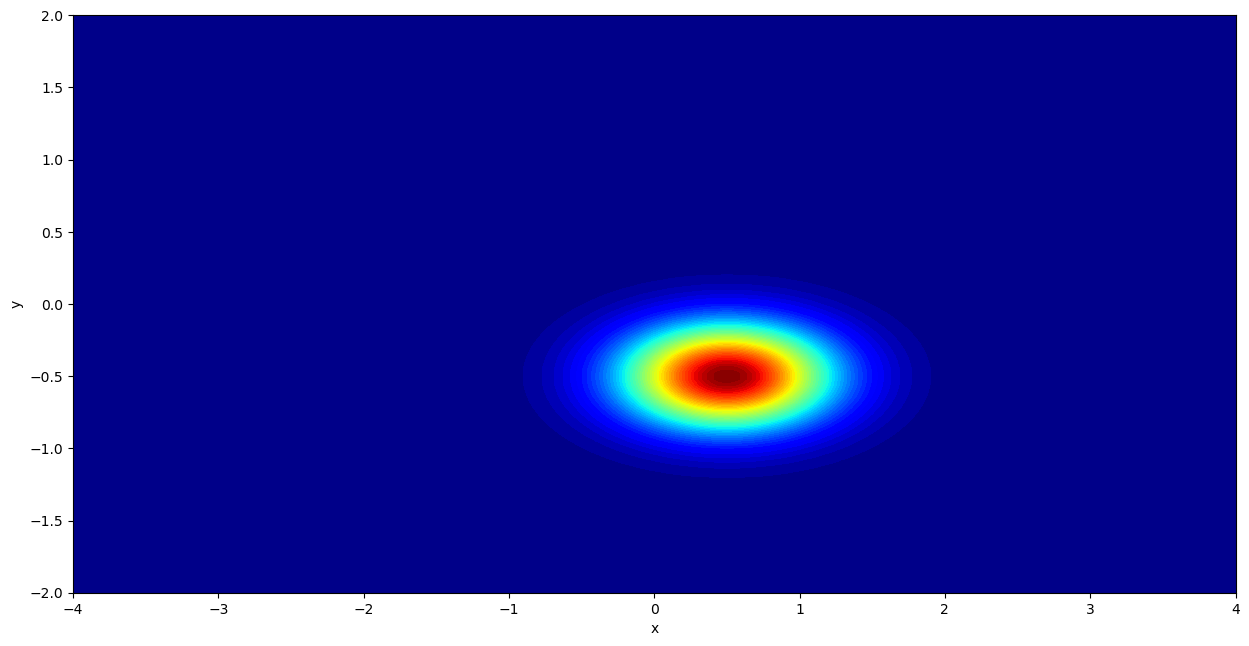

In [35]:
plt.figure(figsize=(15,7.5))

plt.contourf(X, Y, G, 50, cmap='jet', origin='lower')
plt.axis('tight');
plt.xlabel('x');
plt.ylabel('y');

In [36]:
# find the shape of the Gaussian array

print(G.shape)

(101, 201)


In [37]:
# find the index of the maximum value in the flattened array

i = np.argmax(G, axis=None)
print(i)

7549


In [38]:
# convert a flat index i into a tuple of x,y indexes
iy,ix = np.unravel_index(i, G.shape)
print(ix,iy)

112 37


In [39]:
# compute center coordinates
xcen = xMin + ix * dx
ycen = yMin + iy * dy
print( format(xcen,'.2f'),format(ycen,'.2f'))

0.48 -0.52


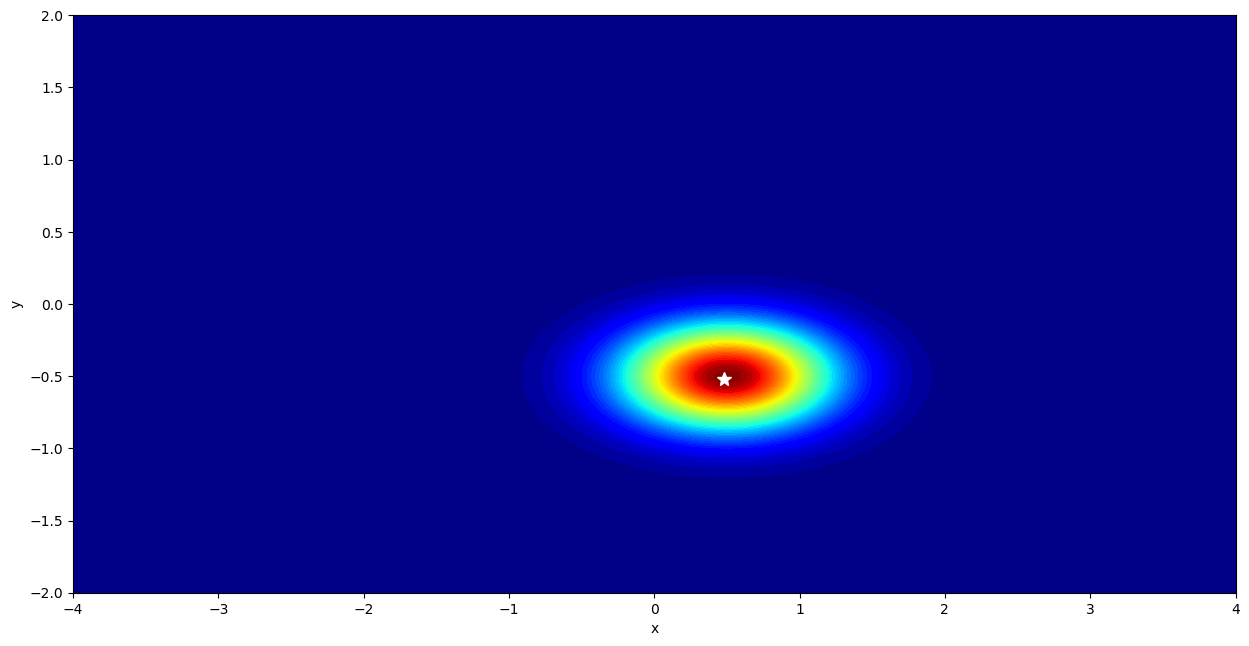

In [40]:
plt.figure(figsize=(15,7.5))

plt.contourf(X, Y, G, 50, cmap='jet', origin='lower')
plt.axis('tight');
plt.xlabel('x');
plt.ylabel('y');

plt.plot(xcen,ycen,'w*',markersize=10);

<img src="https://www.dropbox.com/s/7vd3ezqkyhdxmap/demo.png?raw=1" width="10%" align="left">

# Demo

The **Mandelbrot set** is the collection of complex numbers $c$ for which 

$z_{n+1} = z_n^2 + c$

does not diverge when iterated from $z_0=0$.

## The escape algorithm

Facilitates a convenient representation of the Mandelbrot set. 

The algorithm is initiated at every point in a plane (i.e. scan over all possible $c$ values) and the behavior of $z$ as a function of $n$ determines the color associated with the starting coordinates. 

For example, we could associate with the starting point a color that is proportional with the number of iteration before $z$ starts diverging by more than a set value.

`myMandelbrot()` iterates using $z_{n+1} = z_n^2 + c$ from $z_0=0$.

In [ ]:
def myMandelbrot(c, nIter=10):
    m = np.zeros(nIter+1, dtype=complex)
    
    z = 0 +1j * 0                             # z = 0
    
    for iIter in range(nIter):
        z = z**2 + c                          # z^2 + c
        m[iIter] = z
        
    return m

We can understand the divergent behavior with 3 starting points:

In [ ]:
x1,y1 = 0.20,0.20  # starting coordinate (Cartesian)
x2,y2 = 0.30,0.30
x3,y3 = 0.40,0.40

c1 = x1 +1j * y1   # starting coordinates (complex number)
c2 = x2 +1j * y2
c3 = x3 +1j * y3

The starting points are close to one-another.

In [ ]:
plt.figure(figsize=(6,6))

plt.plot(c1.real,c1.imag,'r.')
plt.plot(c2.real,c2.imag,'g.')
plt.plot(c3.real,c3.imag,'b.') 

plt.axis('equal')
plt.grid()
plt.xlim( -2.5,+1.5 )
plt.ylim( -2,+2 )
plt.show()

`myMandelbrot()` gives the values of $z$ as a function of iteration:

In [ ]:
nIter = 10

m1 = np.zeros(nIter, dtype=complex)
m1 = myMandelbrot(c1,nIter)

m2 = np.zeros(nIter, dtype=complex)
m2 = myMandelbrot(c2,nIter)

m3 = np.zeros(nIter, dtype=complex)
m3 = myMandelbrot(c3,nIter)

The iteration curves show increasingly unstable behavior: 

In [ ]:
plt.figure(figsize=(6,6))

plt.plot(m1.real,m1.imag,'r')  #   stable
plt.plot(m2.real,m2.imag,'g')  #   stable
plt.plot(m3.real,m3.imag,'b')  # unstable

plt.axis('equal')
plt.grid()
plt.xlim( -2.5,+1.5 )
plt.ylim( -2,+2 )
plt.show()

We can use a similar strategy for many points in the $x-y$ plane and assign different colors at the respective coordinates depending on whether the iteration diverges or not. 

For example, we can assign a color corresponding to the iteration at which the absolute value of $z$ exceeds a given threshold.

In [ ]:
xMin, xMax, dx = -2.5, +1.5, 0.005
yMin, yMax, dy = -2.0, +2.0, 0.005

x = np.arange(xMin, xMax + dx, dx)
y = np.arange(yMin, yMax + dy, dy)

X, Y = np.meshgrid(x, y)

Execute $z_{n+1} = z_n^2 + c$ for a larger number of iterations:

In [ ]:
nIter = 32

**non-vectorized code** (uses loops)

In [ ]:
M1 = np.zeros( [y.size,x.size], dtype='uint' )      # Mandelbrot set

tick = time.time()                                  # start clock

for iy in range(y.size):
    for ix in range(x.size):                        # loop over all coordinates
        
        c = x[ix] +1j * y[iy]                       # define c(x,y)
        z = 0     +1j * 0                           # initialize z(x,y)
        
        for iIter in range(nIter):                  # iterate over n
            if(abs(z) < 2.0):                       # check escape condition
                z = z**2 + c                        # update z(x,y)
                M1[iy,ix] += 1                      # escape index 
            else:
                break
        
tock = time.time()                                  # stop clock
dLOOP = int((tock-tick)*1e3)                        # time difference     

print( int(M1.sum()), dLOOP,'ms' )

**vectorized code** (does not use loops)

In [ ]:
M2 = np.zeros( [y.size,x.size], dtype='uint' )       # Mandelbrot set

tick = time.time()                                   # start clock

C = X + 1j * Y
Z = 0 * C

B = np.full ( (y.size,x.size), True, dtype='bool')   # space for escape condition

for iIter in range(nIter):                           # iterate over n
    B = abs(Z) < 2.0                                 # check escape condition        
    Z[ B ] = Z[ B ]**2 + C[ B ]                      # update Z    
    M2[ B ] += 1                                     # escape index
    
tock = time.time()                                   #  stop clock
dVECT = int((tock-tick)*1e3)                         # time difference     

print( int(M2.sum()), dVECT,'ms' )

Plot Mandelbrot sets for both implementations:

In [ ]:
plt.figure(figsize=(12,5.5))

plt.subplot(1,2,1)
plt.contourf(X, Y, M1, 50, cmap='jet', origin='lower')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1,2,2)
plt.contourf(X, Y, M2, 50, cmap='jet', origin='lower')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

<img src="https://www.dropbox.com/s/wj23ce93pa9j8pe/demo.png?raw=1" width="10%" align="left">

# Exercise

Generate generalized Mandelbrot sets of parameter $k$:

$z_{n+1} = z_n^k + c$.
    
Evaluate $z$ for $k=2,3,4,5$ and make a $2\times2$ plots of the $4$ sets.